時間序列

In [6]:
import pandas as pd
import numpy as np

In [4]:
rng = pd.date_range('1/1/2010', periods=100, freq='S') #sec

In [7]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2010-01-01 00:00:00     51
2010-01-01 00:00:01    168
2010-01-01 00:00:02     95
2010-01-01 00:00:03    415
2010-01-01 00:00:04    485
                      ... 
2010-01-01 00:01:35     98
2010-01-01 00:01:36    264
2010-01-01 00:01:37    235
2010-01-01 00:01:38    215
2010-01-01 00:01:39    164
Freq: S, Length: 100, dtype: int32

In [8]:
ts.resample('5Min').sum() #???

2010-01-01    25508
Freq: 5T, dtype: int32

In [9]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [10]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.739233
2012-03-07   -0.642951
2012-03-08   -0.158034
2012-03-09   -1.279766
2012-03-10   -0.745547
Freq: D, dtype: float64

In [12]:
ts.utc = ts.tz_localize('UTC')

In [13]:
ts.utc

2012-03-06 00:00:00+00:00   -0.739233
2012-03-07 00:00:00+00:00   -0.642951
2012-03-08 00:00:00+00:00   -0.158034
2012-03-09 00:00:00+00:00   -1.279766
2012-03-10 00:00:00+00:00   -0.745547
Freq: D, dtype: float64

In [14]:
ts.utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.739233
2012-03-06 19:00:00-05:00   -0.642951
2012-03-07 19:00:00-05:00   -0.158034
2012-03-08 19:00:00-05:00   -1.279766
2012-03-09 19:00:00-05:00   -0.745547
Freq: D, dtype: float64

In [15]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.526847
2012-02-29   -1.425312
2012-03-31   -0.361873
2012-04-30    1.140218
2012-05-31    1.560938
Freq: M, dtype: float64

In [16]:
ps = ts.to_period()
ps

2012-01    0.526847
2012-02   -1.425312
2012-03   -0.361873
2012-04    1.140218
2012-05    1.560938
Freq: M, dtype: float64

In [17]:
ps.to_timestamp()

2012-01-01    0.526847
2012-02-01   -1.425312
2012-03-01   -0.361873
2012-04-01    1.140218
2012-05-01    1.560938
Freq: MS, dtype: float64

In [18]:
prng = pd.period_range('2015Q1', '2016Q4', freq='Q-NOV')

In [19]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [20]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [21]:
ts.head()

2015-03-01 09:00   -1.169014
2015-06-01 09:00    1.262321
2015-09-01 09:00   -0.572940
2015-12-01 09:00    1.790997
2016-03-01 09:00    0.139941
Freq: H, dtype: float64

類別

In [22]:
df = pd.DataFrame({
    "id":[1,2,3,4,5,6],
    "raw_grade":['a','b','b','a','a','e']
})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [23]:
df["grade"]=df["raw_grade"].astype("category")

In [24]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [25]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [26]:
df["grade"]=df["grade"].cat.set_categories([
    "very bad", "bad", "medium", "good", "very good"
])

In [27]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [28]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [29]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

繪圖

In [30]:
import matplotlib.pylab as plt

In [31]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2014', periods=1000))
ts

2014-01-01   -0.393800
2014-01-02   -1.478631
2014-01-03    0.763151
2014-01-04   -0.831330
2014-01-05    1.130702
                ...   
2016-09-22   -0.874625
2016-09-23    1.401036
2016-09-24   -0.379425
2016-09-25    1.606034
2016-09-26    0.226434
Freq: D, Length: 1000, dtype: float64

In [32]:
ts = ts.cumsum()
ts

2014-01-01    -0.393800
2014-01-02    -1.872431
2014-01-03    -1.109280
2014-01-04    -1.940610
2014-01-05    -0.809907
                ...    
2016-09-22    39.496150
2016-09-23    40.897186
2016-09-24    40.517761
2016-09-25    42.123795
2016-09-26    42.350229
Freq: D, Length: 1000, dtype: float64

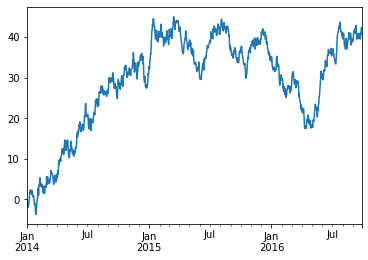

In [33]:
ts.plot()

In [34]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2014-01-01,-0.001805,0.095865,1.061176,-1.800574
2014-01-02,-0.671333,1.150051,0.628401,-2.183337
2014-01-03,0.815267,2.201441,1.517063,-2.587043
2014-01-04,-0.360219,2.986069,2.987679,-3.606024
2014-01-05,-0.548549,3.328754,2.216768,-4.596030
...,...,...,...,...
2016-09-22,-24.080256,21.678007,7.347258,1.148486
2016-09-23,-23.682430,22.277308,6.487723,0.749731
2016-09-24,-24.547527,22.780305,5.872357,0.595358
2016-09-25,-22.702308,23.382161,3.600214,0.261831


<Figure size 432x288 with 0 Axes>

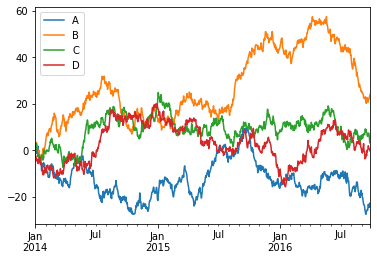

In [35]:
plt.figure(); df.plot(); plt.legend(loc='best')

資料檔案I/O

CSV檔

In [36]:
df

,A,B,C,D
2014-01-01,-0.001805,0.095865,1.061176,-1.800574
2014-01-02,-0.671333,1.150051,0.628401,-2.183337
2014-01-03,0.815267,2.201441,1.517063,-2.587043
2014-01-04,-0.360219,2.986069,2.987679,-3.606024
2014-01-05,-0.548549,3.328754,2.216768,-4.596030
...,...,...,...,...
2016-09-22,-24.080256,21.678007,7.347258,1.148486
2016-09-23,-23.682430,22.277308,6.487723,0.749731
2016-09-24,-24.547527,22.780305,5.872357,0.595358
2016-09-25,-22.702308,23.382161,3.600214,0.261831


In [37]:
df.to_csv('xxx.csv')

In [38]:
dfxxx = pd.read_csv('xxx.csv')

In [39]:
dfxxx

,Unnamed: 0,A,B,C,D
0,2014-01-01,-0.001805,0.095865,1.061176,-1.800574
1,2014-01-02,-0.671333,1.150051,0.628401,-2.183337
2,2014-01-03,0.815267,2.201441,1.517063,-2.587043
3,2014-01-04,-0.360219,2.986069,2.987679,-3.606024
4,2014-01-05,-0.548549,3.328754,2.216768,-4.596030
...,...,...,...,...,...
995,2016-09-22,-24.080256,21.678007,7.347258,1.148486
996,2016-09-23,-23.682430,22.277308,6.487723,0.749731
997,2016-09-24,-24.547527,22.780305,5.872357,0.595358
998,2016-09-25,-22.702308,23.382161,3.600214,0.261831


Excel 檔

In [40]:
df.to_excel('xxx.xlsx', sheet_name = 'Sheet1')

In [41]:
pd.read_excel('xxx.xlsx', 'Sheet1', index_col=None,na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2014-01-01,-0.001805,0.095865,1.061176,-1.800574
1,2014-01-02,-0.671333,1.150051,0.628401,-2.183337
2,2014-01-03,0.815267,2.201441,1.517063,-2.587043
3,2014-01-04,-0.360219,2.986069,2.987679,-3.606024
4,2014-01-05,-0.548549,3.328754,2.216768,-4.596030
...,...,...,...,...,...
995,2016-09-22,-24.080256,21.678007,7.347258,1.148486
996,2016-09-23,-23.682430,22.277308,6.487723,0.749731
997,2016-09-24,-24.547527,22.780305,5.872357,0.595358
998,2016-09-25,-22.702308,23.382161,3.600214,0.261831
